# Exact Simulation of the Hamiltonian

Let me consider the following Hamiltonian
$$\mathcal{H} = \omega (\sigma_x \otimes \sigma_z \otimes \sigma_y \otimes \sigma_x)$$
where the Pauli matrices $𝜎_𝑥$, and $𝜎_𝑦$ can be expressed in terms of
$𝜎_𝑧$ using the following identities:
$$\sigma_x = H \sigma_z H, \qquad \sigma_y = SH \sigma_z HS^†$$

and the gates $𝐻$ (Hadamard) and $𝑆$ are given by:
$$H = \dfrac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}\qquad \text{and}\qquad
S = \begin{pmatrix}
1 & 0 \\
0 & i \\
\end{pmatrix}$$
thus
\begin{eqnarray}
\mathcal{H} &=& \omega (\sigma_x \otimes \sigma_z \otimes \sigma_y \otimes \sigma_x) \\
 &=& \omega (H\otimes I \otimes SH \otimes H )(\sigma_z \otimes \sigma_z \otimes \sigma_z \otimes \sigma_z)(H\otimes I \otimes HS^\dagger \otimes H )
\end{eqnarray}


Regarding this fact that $H$ and $S$ are unitary gate we can write
\begin{eqnarray}
U &=& \text{e}^{-i\mathcal{H}t} \\
 &=&  (H\otimes I \otimes SH \otimes H )\text{e}^{-i\omega(\sigma_z \otimes \sigma_z \otimes \sigma_z \otimes \sigma_z)t}(H\otimes I \otimes HS^\dagger \otimes H )
\end{eqnarray}


the $\text{e}^{-i\omega(\sigma_z \otimes \sigma_z \otimes \sigma_z \otimes \sigma_z)t}$ is a famous form of quantum operator that can be expressed just according to the CNOT and rotation $z$ gates. For more details you can see [this reference](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RZZGate)

In the following piece of codes I will try to simulate this Hamiltonian by using qiskit package

# Installing the qiskit and importing the libraries

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

import math
from math import pi,comb, floor

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit import  Parameter
from qiskit.visualization import *

## Function for plotting quantum circuit

In [ ]:
def qplot(x):
  return x.draw('mpl', initial_state = True, scale = 0.8, fold = False)

# Function for doing tensor product

In [ ]:
def f(x,y):
  return np.kron(x,y)

# Some basic quantum operators

In [ ]:
x = np.array([[0,1],[1,0]])                       # Pauli sigma X matrix
y = np.array([[0,-1j],[1j,0]])                    # Pauli sigma X matrix
z = np.array([[1,0],[0,-1]])                      # Pauli sigma X matrix
h = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])       # Pauli sigma X matrix
cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
Ocnot = np.array([[0,1,0,0],[1,0,0,0],[0,0,1,0],[0,0,0,1]])
cz = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])

zero = one = np.array([[1],[0]])                  # |0>
one = np.array([[0],[1]])                         # |1>
v = (1/2)*np.array([[1+1j,1-1j],[1-1j,1+1j]])     # qiskit sx gate; sqrt(x)
e = np.array([[1,0],[0,1]])

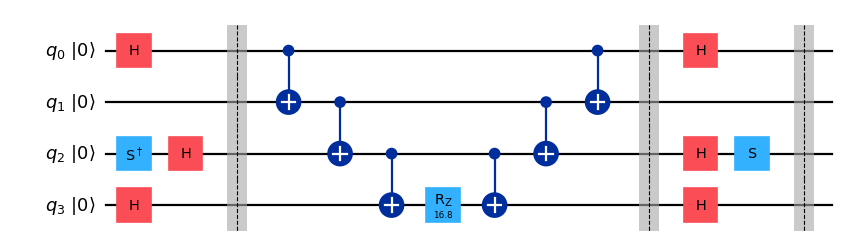

<IPython.core.display.Latex object>

In [ ]:
omega = 0.4
t= 21

num_qubit = 4
# Building the main block of the Suzuki-Trotter
cirq = QuantumCircuit(num_qubit)
cirq.h(0)
cirq.sdg(2)
cirq.h(2)
cirq.h(3)
cirq.barrier()

for i in range(num_qubit-1):
  cirq.cx(i,i+1)

cirq.rz((omega*2*t), num_qubit-1)

for i in reversed(range(num_qubit-1)):
    cirq.cx(i, i+1)
cirq.barrier()

cirq.h(0)
cirq.h(2)
cirq.s(2)
cirq.h(3)
cirq.barrier()


display(qplot(cirq), Statevector(cirq).draw('latex'))

In [ ]:
U_quantum = Operator(cirq.reverse_bits()).data

array_to_latex(U_quantum)

<IPython.core.display.Latex object>

## Exact Solution By using Scipy library

In [ ]:
hamiltonian = omega*(f(f(f(x,z),y),x))

In [ ]:
# Exact Answer
U_exact = expm(-1j*hamiltonian*t)
array_to_latex(U_exact)

<IPython.core.display.Latex object>

## Checking if these two matrix are equal

In [ ]:
np.allclose(U_exact, U_quantum)

True